In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import json



In [2]:
import pandas as pd
df = pd.read_excel("Provisional_COVID-19_Deaths_by_Sex_and_Age_20240708 (1).xlsx")
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,2023-09-27,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
1,2023-09-27,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN
2,2023-09-27,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN
3,2023-09-27,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN
4,2023-09-27,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137695,2023-09-27,2023-09-01,2023-09-23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,NaN,75.0,14.0,NaN,0.0,14.0,One or more data cells have counts between 1-9...
137696,2023-09-27,2023-09-01,2023-09-23,By Month,2023.0,9.0,Puerto Rico,Female,55-64 years,0.0,65.0,10.0,0.0,0.0,10.0,NaN
137697,2023-09-27,2023-09-01,2023-09-23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,NaN,91.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
137698,2023-09-27,2023-09-01,2023-09-23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,NaN,211.0,36.0,NaN,0.0,38.0,One or more data cells have counts between 1-9...


In [3]:
df=df.drop(columns=["Year","Month","Footnote", "Pneumonia, Influenza, or COVID-19 Deaths", "Start Date", "End Date", "Pneumonia and COVID-19 Deaths"])

In [4]:
df.columns

Index(['Data As Of', 'Group', 'State', 'Sex', 'Age Group', 'COVID-19 Deaths',
       'Total Deaths', 'Pneumonia Deaths', 'Influenza Deaths'],
      dtype='object')

In [5]:
df

,Data As Of,Group,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
0,2023-09-27,By Total,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,22229.0
1,2023-09-27,By Total,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,64.0
2,2023-09-27,By Total,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,509.0
3,2023-09-27,By Total,United States,All Sexes,1-4 years,285.0,14299.0,692.0,177.0
4,2023-09-27,By Total,United States,All Sexes,5-14 years,509.0,22008.0,818.0,219.0
...,...,...,...,...,...,...,...,...,...
137695,2023-09-27,By Month,Puerto Rico,Female,50-64 years,NaN,75.0,14.0,0.0
137696,2023-09-27,By Month,Puerto Rico,Female,55-64 years,0.0,65.0,10.0,0.0
137697,2023-09-27,By Month,Puerto Rico,Female,65-74 years,NaN,91.0,NaN,0.0
137698,2023-09-27,By Month,Puerto Rico,Female,75-84 years,NaN,211.0,36.0,0.0


In [6]:
df=df.fillna(0)

In [7]:
df[["COVID-19 Deaths","Total Deaths", "Pneumonia Deaths", "Influenza Deaths"]]=df[["COVID-19 Deaths","Total Deaths", "Pneumonia Deaths", "Influenza Deaths"]].astype(int)


In [8]:
df=df.rename(columns={"Group":"Totals By"})
df

,Data As Of,Totals By,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
0,2023-09-27,By Total,United States,All Sexes,All Ages,1146774,12303399,1162844,22229
1,2023-09-27,By Total,United States,All Sexes,Under 1 year,519,73213,1056,64
2,2023-09-27,By Total,United States,All Sexes,0-17 years,1696,130970,2961,509
3,2023-09-27,By Total,United States,All Sexes,1-4 years,285,14299,692,177
4,2023-09-27,By Total,United States,All Sexes,5-14 years,509,22008,818,219
...,...,...,...,...,...,...,...,...,...
137695,2023-09-27,By Month,Puerto Rico,Female,50-64 years,0,75,14,0
137696,2023-09-27,By Month,Puerto Rico,Female,55-64 years,0,65,10,0
137697,2023-09-27,By Month,Puerto Rico,Female,65-74 years,0,91,0,0
137698,2023-09-27,By Month,Puerto Rico,Female,75-84 years,0,211,36,0


In [9]:
us_df= df.head(17).copy()
us_df=pd.DataFrame(us_df)
us_df

,Data As Of,Totals By,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
0,2023-09-27,By Total,United States,All Sexes,All Ages,1146774,12303399,1162844,22229
1,2023-09-27,By Total,United States,All Sexes,Under 1 year,519,73213,1056,64
2,2023-09-27,By Total,United States,All Sexes,0-17 years,1696,130970,2961,509
3,2023-09-27,By Total,United States,All Sexes,1-4 years,285,14299,692,177
4,2023-09-27,By Total,United States,All Sexes,5-14 years,509,22008,818,219
5,2023-09-27,By Total,United States,All Sexes,15-24 years,3021,133459,3175,206
6,2023-09-27,By Total,United States,All Sexes,18-29 years,7030,231382,7038,329
7,2023-09-27,By Total,United States,All Sexes,25-34 years,12401,278680,11706,464
8,2023-09-27,By Total,United States,All Sexes,30-39 years,19886,348041,18395,644
9,2023-09-27,By Total,United States,All Sexes,35-44 years,30108,416477,27301,797


In [10]:
sex_us=df.iloc[17:51,[0,1,2,3,4,5,6,7,8]].copy()
sex_us = pd.DataFrame(sex_us)
sex_us

,Data As Of,Totals By,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
17,2023-09-27,By Total,United States,Male,All Ages,629728,6469164,645490,10848
18,2023-09-27,By Total,United States,Male,Under 1 year,284,40371,586,40
19,2023-09-27,By Total,United States,Male,0-17 years,910,76420,1601,282
20,2023-09-27,By Total,United States,Male,1-4 years,151,8102,341,109
21,2023-09-27,By Total,United States,Male,5-14 years,261,12850,449,104
22,2023-09-27,By Total,United States,Male,15-24 years,1797,97748,1917,104
23,2023-09-27,By Total,United States,Male,18-29 years,4301,168776,4276,172
24,2023-09-27,By Total,United States,Male,25-34 years,7607,196824,7129,235
25,2023-09-27,By Total,United States,Male,30-39 years,12263,237089,11180,323
26,2023-09-27,By Total,United States,Male,35-44 years,18602,273868,16415,415


In [11]:
us_sex_all =sex_us.iloc[[0,17], [0,1,2,3,4,5,6,7,8]].copy()
us_sex_all=pd.DataFrame(us_sex_all)
us_sex_all

,Data As Of,Totals By,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
17,2023-09-27,By Total,United States,Male,All Ages,629728,6469164,645490,10848
34,2023-09-27,By Total,United States,Female,All Ages,517046,5834235,517354,11381


In [12]:
state_df = df.iloc[51:119340, [0,1,2,3,4,5,6,7,8]].copy()
state_df= pd.DataFrame (state_df)
state_df

,Data As Of,Totals By,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
51,2023-09-27,By Total,Alabama,All Sexes,All Ages,21520,231602,17619,356
52,2023-09-27,By Total,Alabama,All Sexes,Under 1 year,0,1491,19,0
53,2023-09-27,By Total,Alabama,All Sexes,0-17 years,19,2691,45,0
54,2023-09-27,By Total,Alabama,All Sexes,1-4 years,0,344,13,0
55,2023-09-27,By Total,Alabama,All Sexes,5-14 years,0,453,11,0
...,...,...,...,...,...,...,...,...,...
119335,2023-09-27,By Month,Texas,Female,50-64 years,13,476,38,0
119336,2023-09-27,By Month,Texas,Female,55-64 years,10,354,26,0
119337,2023-09-27,By Month,Texas,Female,65-74 years,10,726,50,0
119338,2023-09-27,By Month,Texas,Female,75-84 years,22,1060,57,0


In [13]:
tx_df = df.iloc[117047:119340, [0,1,2,3,4,5,6,7,8]].copy()
tx_df =pd.DataFrame(tx_df)
tx_df

,Data As Of,Totals By,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
117047,2023-09-27,By Month,Texas,All Sexes,0-17 years,0,312,0,0
117048,2023-09-27,By Month,Texas,All Sexes,1-4 years,0,30,0,0
117049,2023-09-27,By Month,Texas,All Sexes,5-14 years,0,56,0,0
117050,2023-09-27,By Month,Texas,All Sexes,15-24 years,0,261,0,0
117051,2023-09-27,By Month,Texas,All Sexes,18-29 years,0,396,14,0
...,...,...,...,...,...,...,...,...,...
119335,2023-09-27,By Month,Texas,Female,50-64 years,13,476,38,0
119336,2023-09-27,By Month,Texas,Female,55-64 years,10,354,26,0
119337,2023-09-27,By Month,Texas,Female,65-74 years,10,726,50,0
119338,2023-09-27,By Month,Texas,Female,75-84 years,22,1060,57,0


In [14]:
df2 = pd.read_excel("estimated_us population.xlsx", header=3,nrows=57)
df2

,Unnamed: 0,Unnamed: 1,2020,2021,2022,2023
0,United States,331464948,331526933,332048977,333271411,334914895
1,Northeast,57614141,57430477,57243423,57026847,56983517
2,Midwest,68987296,68969794,68850246,68783028,68909283
3,South,126268529,126465281,127353282,128702030,130125290
4,West,78594982,78661381,78602026,78759506,78896805
5,.Alabama,5024294,5031864,5050380,5073903,5108468
6,.Alaska,733374,732964,734923,733276,733406
7,.Arizona,7157902,7186683,7272487,7365684,7431344
8,.Arkansas,3011490,3014348,3028443,3046404,3067732
9,.California,39538212,39503200,39145060,39040616,38965193


In [15]:
df2=df2.drop(index=[0,1,2,3,4])
df2

,Unnamed: 0,Unnamed: 1,2020,2021,2022,2023
5,.Alabama,5024294,5031864,5050380,5073903,5108468
6,.Alaska,733374,732964,734923,733276,733406
7,.Arizona,7157902,7186683,7272487,7365684,7431344
8,.Arkansas,3011490,3014348,3028443,3046404,3067732
9,.California,39538212,39503200,39145060,39040616,38965193
10,.Colorado,5773707,5785219,5811596,5841039,5877610
11,.Connecticut,3605912,3577586,3603691,3608706,3617176
12,.Delaware,989946,991862,1004881,1019459,1031890
13,.District of Columbia,689548,670839,669037,670949,678972
14,.Florida,21538216,21591299,21830708,22245521,22610726


In [16]:
df2=df2.rename(columns={"Unnamed: 0":"State", "Unnamed: 1": "april_1_2020"})
df2

,State,april_1_2020,2020,2021,2022,2023
5,.Alabama,5024294,5031864,5050380,5073903,5108468
6,.Alaska,733374,732964,734923,733276,733406
7,.Arizona,7157902,7186683,7272487,7365684,7431344
8,.Arkansas,3011490,3014348,3028443,3046404,3067732
9,.California,39538212,39503200,39145060,39040616,38965193
10,.Colorado,5773707,5785219,5811596,5841039,5877610
11,.Connecticut,3605912,3577586,3603691,3608706,3617176
12,.Delaware,989946,991862,1004881,1019459,1031890
13,.District of Columbia,689548,670839,669037,670949,678972
14,.Florida,21538216,21591299,21830708,22245521,22610726


In [17]:
df2=df2.dropna()
df2.columns

Index(['State', 'april_1_2020', 2020, 2021, 2022, 2023], dtype='object')

In [18]:
df2[["april_1_2020",2020, 2021, 2022, 2023]]=df2[["april_1_2020",2020, 2021, 2022, 2023]].astype(int)
df2


,State,april_1_2020,2020,2021,2022,2023
5,.Alabama,5024294,5031864,5050380,5073903,5108468
6,.Alaska,733374,732964,734923,733276,733406
7,.Arizona,7157902,7186683,7272487,7365684,7431344
8,.Arkansas,3011490,3014348,3028443,3046404,3067732
9,.California,39538212,39503200,39145060,39040616,38965193
10,.Colorado,5773707,5785219,5811596,5841039,5877610
11,.Connecticut,3605912,3577586,3603691,3608706,3617176
12,.Delaware,989946,991862,1004881,1019459,1031890
13,.District of Columbia,689548,670839,669037,670949,678972
14,.Florida,21538216,21591299,21830708,22245521,22610726


In [19]:
df2["State"]=df2["State"].str.replace("."," ")
df2

,State,april_1_2020,2020,2021,2022,2023
5,Alabama,5024294,5031864,5050380,5073903,5108468
6,Alaska,733374,732964,734923,733276,733406
7,Arizona,7157902,7186683,7272487,7365684,7431344
8,Arkansas,3011490,3014348,3028443,3046404,3067732
9,California,39538212,39503200,39145060,39040616,38965193
10,Colorado,5773707,5785219,5811596,5841039,5877610
11,Connecticut,3605912,3577586,3603691,3608706,3617176
12,Delaware,989946,991862,1004881,1019459,1031890
13,District of Columbia,689548,670839,669037,670949,678972
14,Florida,21538216,21591299,21830708,22245521,22610726


In [20]:
df2.to_csv("us_pop_info.csv")
df.to_csv("covid.csv", encoding="utf8", index=False)
us_df.to_csv("us_totals.csv", encoding="utf8", index=False)
tx_df.to_csv("tx_totals.csv", encoding="utf8", index=False)
state_df.to_csv("state_totals.csv", encoding="utf8", index=False)
sex_us.to_csv("us_sex_totals.csv", encoding="utf8", index=False)


In [29]:
us_sex_all

,Data As Of,Totals By,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths
17,2023-09-27,By Total,United States,Male,All Ages,629728,6469164,645490,10848
34,2023-09-27,By Total,United States,Female,All Ages,517046,5834235,517354,11381


<Axes: title={'center': '% Number of Deaths All Illnesses'}, ylabel='Sex'>

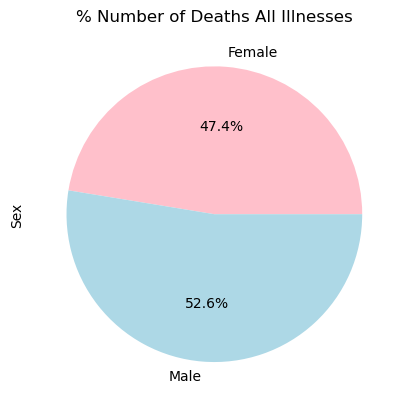

In [36]:
sex_count = us_sex_all.groupby("Sex")["Total Deaths"].sum()
sex_count.plot(kind="pie", autopct="%1.1f%%", ylabel="Sex", title="% Number of Deaths All Illnesses", colors=["Pink","Lightblue"])